**목적** : 주요 모델에 대해, 구현방식 정리(Sequential API, Functional API, Subclassing API)

+ 일반 회귀모형
    |           |Sequential API|Functional API|Subclassing API|
    |---        |:-:|:-:|:-:|
    |linear     | ✅ | ✅ | ✅ |
    |logistic   | ✅ | ✅ | ✅ |

+ Text 모형
    |           |Sequential API|Functional API|Subclassing API|
    |---        |:-:|:-:|:-:|
    |RNN        | - | - | - |
    |GRU        | 📌 |   |   |
    |bi-LSTM    | 📍 |   |   |
    |1D-CNN     | ✅ | ❎ |   |
</p>

+ image 모형
    |           |Sequential API|Functional API|Subclassing API|
    |---        |:-:|:-:|:-:|
    |CNN        | ✅ | ✅ | ✅ |


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow import keras

import pandas as pd

import matplotlib.pylab as plt

### 1. 일반 회귀모형

In [ ]:
# data load : sample(kaggle)

df = pd.read_csv(r'C:\Users\khpark\Downloads\ikea.csv')
df = df.dropna().reset_index(drop=True)

y = df['price']
X = df[['depth', 'height', 'width']]

In [ ]:
# input_format
X.values[:3]

array([[ 50., 100.,  60.],
       [ 60.,  43.,  74.],
       [ 45.,  91.,  40.]])

In [ ]:
# output_format
y.values[:3]

array([ 69., 225., 345.])

#### Linear Regression

In [ ]:
# Sequential API : Linear Regression

model = tf.keras.models.Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = model.fit(X, y, epochs= 3)

Epoch 1/3
60/60 [==============================] - 1s 3ms/step - loss: nan - mse: nan             
Epoch 2/3
60/60 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 3/3
60/60 [==============================] - 0s 2ms/step - loss: nan - mse: nan


In [ ]:
# Functional API : Linear Regression

inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)
linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = linear_model.fit(X, y, epochs= 3)

Epoch 1/3
60/60 [==============================] - 1s 3ms/step - loss: nan - mse: nan             
Epoch 2/3
60/60 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 3/3
60/60 [==============================] - 0s 3ms/step - loss: nan - mse: nan


In [ ]:
# Subclass model: Linear Regression
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=4, activation='linear')
  def call(self, x):
    y_pred = self.linear_layer(x)
    return y_pred

model = LinearRegression()
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = model.fit(X, y, epochs=3)

Epoch 1/3
60/60 [==============================] - 1s 3ms/step - loss: nan - mse: nan            
Epoch 2/3
60/60 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 3/3
60/60 [==============================] - 0s 2ms/step - loss: nan - mse: nan


#### Logistic Regression

In [ ]:
# Sequential API : Logistic Regression

model = tf.keras.models.Sequential()
model.add(Dense(1, input_dim=3, activation='softmax'))

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = model.fit(X, y, epochs= 3)

Epoch 1/3
60/60 [==============================] - 1s 2ms/step - loss: 3508761.0000 - mse: 3508761.0000
Epoch 2/3
60/60 [==============================] - 0s 2ms/step - loss: 3508762.5000 - mse: 3508762.5000
Epoch 3/3
60/60 [==============================] - 0s 3ms/step - loss: 3508761.2500 - mse: 3508761.2500


In [ ]:
# Functional API : Logistic Regression

inputs = Input(shape=(3,))
output = Dense(1, activation='softmax')(inputs)
model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = model.fit(X, y, epochs= 3)

Epoch 1/3
60/60 [==============================] - 1s 2ms/step - loss: 3508761.5000 - mse: 3508761.5000
Epoch 2/3
60/60 [==============================] - 0s 2ms/step - loss: 3508762.2500 - mse: 3508762.2500
Epoch 3/3
60/60 [==============================] - 0s 2ms/step - loss: 3508762.2500 - mse: 3508762.2500


In [ ]:
# Subclass model: Logstic Regression
class LogisticRegression(tf.keras.Model):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.layer = tf.keras.layers.Dense(1, input_dim=10, activation='softmax')
  def call(self, x):
    y_pred = self.layer(x)
    return y_pred

model = LogisticRegression()
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

history = model.fit(X, y, epochs=3)

Epoch 1/3
60/60 [==============================] - 1s 2ms/step - loss: 3508762.2500 - mse: 3508762.2500
Epoch 2/3
60/60 [==============================] - 0s 3ms/step - loss: 3508761.5000 - mse: 3508761.5000
Epoch 3/3
60/60 [==============================] - 0s 2ms/step - loss: 3508762.5000 - mse: 3508762.5000


### Text 모델

In [4]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

#### 1.RNN

In [1]:
# Sequential API : RNN
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras import layers

model = tf.keras.models.Sequential()
model.add(layers.SimpleRNN(32, input_shape=(3,1)) )
model.add(Dense(1, input_dim=32, activation='softmax'))

NameError: name 'tf' is not defined

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# sgd = optimizers.SGD(learning_rate=0.01)
# model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# history = model.fit(X, y, epochs= 3)

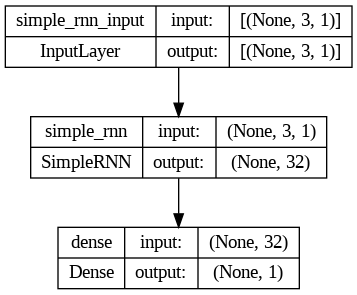

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import keras

In [5]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

def RNN_model(num_tags, num_words, num_departments ):
    title_input= keras.Input(shape=(None,), name="title")           # Variable-length sequence of ints
    body_input = keras.Input(shape=(None,), name="body")            # Variable-length sequence of ints
    tags_input = keras.Input(shape=(num_tags,), name="tags" )       # Binary vectors of size `num_tags`

    title_features = layers.Embedding(num_words, 64)(title_input)   # Embed each word in the title into a 64-dimensional vector
    title_features = layers.LSTM(128)(title_features)               # Reduce sequence of embedded words in the title into a single 128-dimensional vector

    body_features = layers.Embedding(num_words, 64)(body_input)     # Embed each word in the text into a 64-dimensional vector
    body_features = layers.LSTM(32)(body_features)                  # Reduce sequence of embedded words in the body into a single 32-dimensional vector


    x = layers.concatenate([title_features, body_features, tags_input]) # Merge all available features into a single large vector via concatenation

    priority_pred = layers.Dense(1, name="priority")(x)             # Stick a logistic regression for priority prediction on top of the features
    department_pred = layers.Dense(num_departments, name="department")(x) # Stick a department classifier on top of the features

    # Instantiate an end-to-end model predicting both priority and department
    model = keras.Model(inputs = [title_input, body_input, tags_input],
                        outputs= [priority_pred, department_pred],
    )
    return model

model = RNN_model(num_tags, num_words, num_departments )

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, None)]       0           []                               
                                                                                                  
 body (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 64)     640000      ['title[0][0]']                  
                                                                                                  
 embedding_3 (Embedding)        (None, None, 64)     640000      ['body[0][0]']                   
                                                                                            

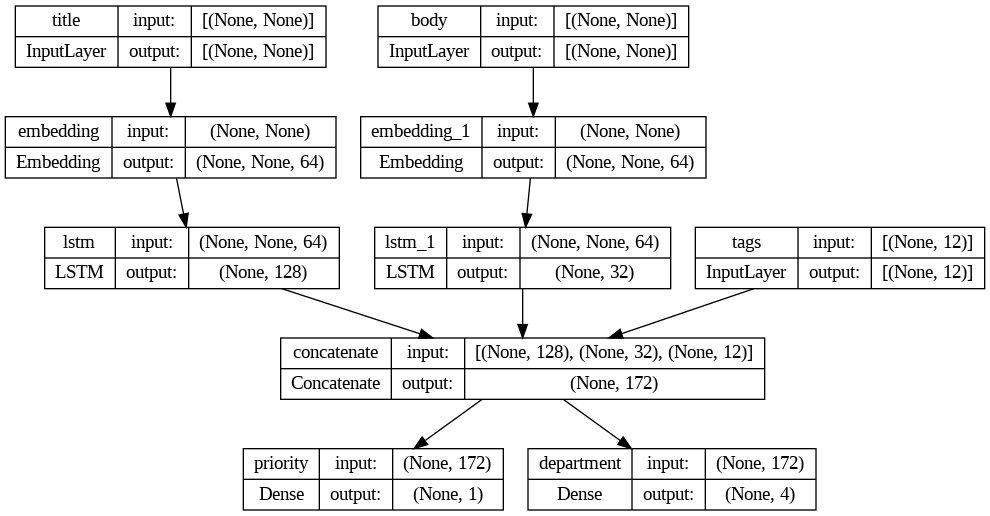

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Image 모델

In [ ]:
# 자료 불러오기


#### CNN

In [7]:
# Sequential API

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28,1)),
    tf.keras.Input(shape=(28, 28, 1) ),
    tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation= 'relu', padding='SAME' ),
    tf.keras.layers.MaxPool2D(padding='SAME'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation= 'relu', padding='SAME' ),
    tf.keras.layers.MaxPool2D(padding='SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])



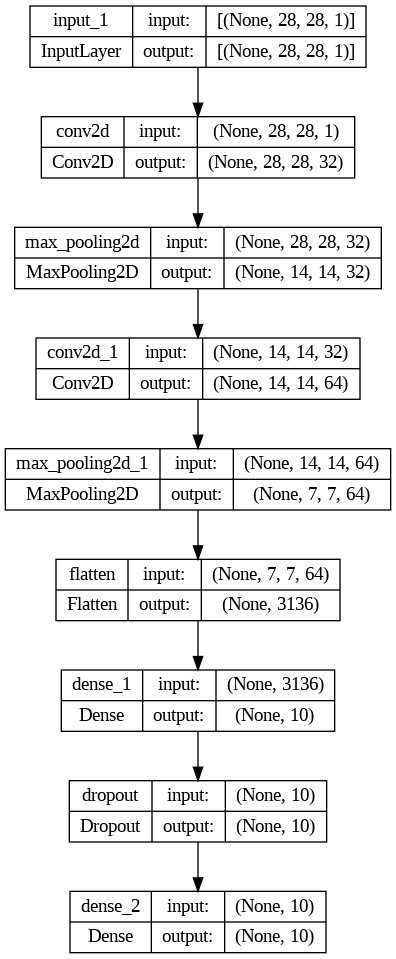

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
# Functional API : CNN
input_layer = tf.keras.Input(shape=(3, ), name='InputLayer')

x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='Dense3')(x3)
x5 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x4)

model = tf.keras.Model(inputs=input_layer, outputs=x5, name='FunctionalModel')

In [10]:
def CNN_model():
    input_layer = tf.keras.Input(shape=(28,28, 1), name='InputLayer')
    conv1 = tf.keras.layers.Conv2D(filters = 64, kernel_size=[3,3], padding = 'SAME', activation=tf.nn.relu )(input_layer)
    pool1 = tf.keras.layers.MaxPool2D(padding = 'SAME')(conv1)

    conv2 = tf.keras.layers.Conv2D(filters = 128, kernel_size= [3,3], padding = 'SAME', activation=tf.nn.relu )(pool1)
    pool2 = tf.keras.layers.MaxPool2D(padding = 'SAME')(conv2)

    flat3 = tf.keras.layers.Flatten()(pool2)

    dense4 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu )(flat3)
    drop4  = tf.keras.layers.Dropout(rate = 0.4)(dense4)
    logits = tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax )(drop4)

    model = Model(inputs= input_layer, outputs = logits)

    return model


In [11]:
model = CNN_model()

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0   

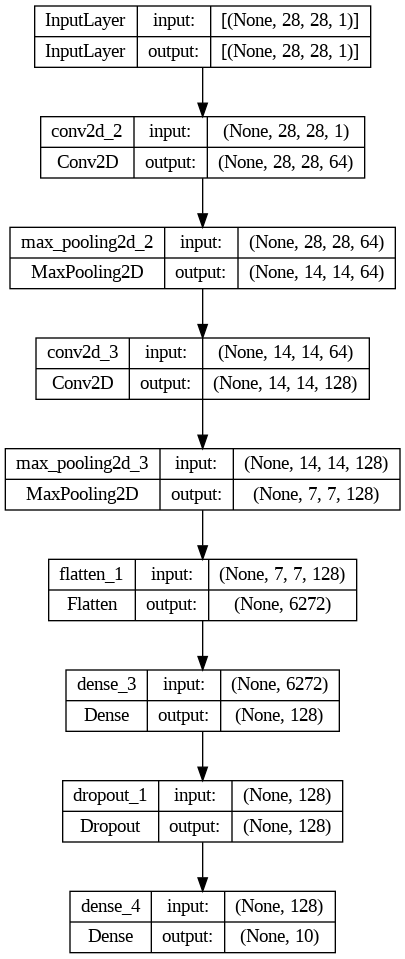

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
# Subclass model: CNN

temp_inputs = keras.Input(shape=(28, 28, 1))

class CNN_model(tf.keras.Model):
    # 기본이 되는 층을 구현
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10, activation=tf.nn.softmax)
    # init에서 만든 층을 불러와서 network 구성 (연산부분을 담당)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

In [ ]:
model = CNN_model()

model(temp_inputs)

model.summary() # 모델에 대한 요약 출력해줌

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           multiple                  73856     
                                                                 
 max_pooling2d_2 (MaxPooling  multiple                 0 

In [ ]:
# CNN 모델 구조 확정하고 컴파일 진행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  # 측정값 : accuracy

# 학습실행
history = model.fit(train_images, train_labels,   # 입력값
                    batch_size=100,               # 1회마다 배치마다 100개 프로세스
                    epochs=15,                    # 15회 학습
                    verbose=1,                    # verbose는 학습 중 출력되는 문구를 설정하는 것
                    validation_data=(test_images, test_labels)) # test를 val로 사용

# test 값 결과 확인
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])